In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

In [2]:
data = pd.read_csv('insurance.csv')

### Analise Exploratoria dos dados:

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#variaveis nao categoricas
data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [5]:
#variaveis categoricas:
data[['sex', 'smoker', 'region' ]].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
data['region'].unique()

array([0, 1, 2, 3], dtype=int64)

#### obs: ainda preciso fazer uma analise mais detalhada, com graficos e analises de outliers

### Correlação entre as variaveis: correlação linear de Pearson

In [17]:
#AGE: correlação positiva e moderada
np.corrcoef(data.charges, data.age)

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [9]:
#bmi:correlação positiva e fraca
np.corrcoef(data.charges, data.bmi)

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

In [10]:
#children: correlação positiva e fraca
np.corrcoef(data.charges, data.children)

array([[1.        , 0.06799823],
       [0.06799823, 1.        ]])

In [11]:
#smoker: correlação positiva e forte

#tranformando em variavel binaria
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})


Y5 = data['smoker'].values
np.corrcoef(data.charges, Y5)


array([[1.        , 0.78725143],
       [0.78725143, 1.        ]])

In [12]:
#region: correlação positiva e fraca
data['region'] = data['region'].map({'southeast': 1, 'southwest': 0, 'northwest' : 2, 'northeast': 3 })
Y6 = data['region'].values
np.corrcoef(data.charges, Y6)


array([[1.        , 0.00620823],
       [0.00620823, 1.        ]])

In [14]:
#sex: correlação positiva e fraca
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

Y7 = data['sex'].values
np.corrcoef(data.charges, Y7)


array([[1.        , 0.05729206],
       [0.05729206, 1.        ]])

### Separando Conjunto para Teste e Treino do modelo

In [20]:
Ytotal = data['charges']
Xtotal = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [21]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_Treino, Y_teste = train_test_split(Xtotal, Ytotal, random_state = 17, test_size = 0.2)

#### obs: pretendo usar validação cruzada no futuro

### Regressão Linear Multipla:

In [22]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [23]:
modelo.fit(X_treino, Y_Treino )

#coeficiente de determinação R^2
modelo.score(X_treino, Y_Treino )

0.7517330722141086

#### obs: cerca de 75,17% da variação na variável dependente é explicada pelas variáveis independentes incluídas no modelo.

In [27]:
y_pred = modelo.predict(X_teste)

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_teste, y_pred)

3935.7383337773367

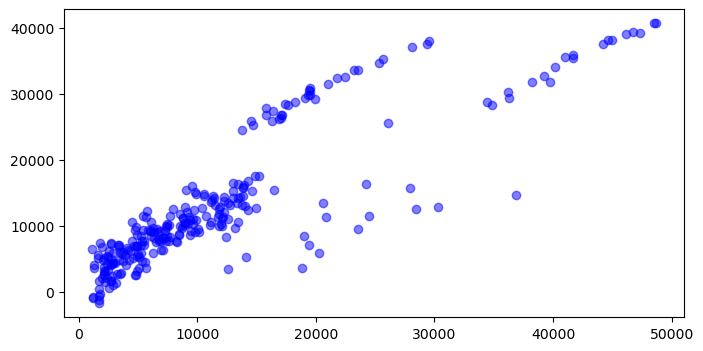

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
plt.scatter(Y_teste, y_pred, color='blue', alpha=0.5, label='Previsões vs. Reais')

#### existe certa tendencia bem proxima a reta x = y onde a maior parte dos dados se encontram, provavelmente conseguirei melhorar ainda mais esse modelo.